In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [ ]:
#Loading the dataset
diabetes_data = pd.read_csv('PATH TO DATASET')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,ID,No. of nodules,Sub nodes,Subtlety,Internal Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Maligancy,Diameter,Surface Area,Volume,Cancerous
0,1.0,1.0,NaN,5,1,6,3,3,3,4,4,4,32.21,2801.43,7869.37,Yes
1,2.0,1.0,NaN,2,1,6,5,1,1,1,1,5,30.02,2880.76,6576.90,Yes
2,3.0,4.0,1.0,5,1,6,3,3,2,2,3,5,30.35,1923.00,5190.67,Yes
3,NaN,NaN,2.0,4,1,6,3,4,1,1,5,4,13.35,315.10,437.39,Yes
4,NaN,NaN,3.0,4,1,6,4,5,1,1,5,4,14.67,624.43,1261.71,Yes


In [ ]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  412 non-null    float64
 1   No. of nodules      412 non-null    float64
 2   Sub nodes           1182 non-null   float64
 3   Subtlety            1186 non-null   int64  
 4   Internal Structure  1186 non-null   int64  
 5   Calcification       1186 non-null   int64  
 6   Sphericity          1186 non-null   int64  
 7   Margin              1186 non-null   int64  
 8   Lobulation          1186 non-null   int64  
 9   Spiculation         1186 non-null   int64  
 10  Texture             1186 non-null   int64  
 11  Maligancy           1186 non-null   int64  
 12  Diameter            1186 non-null   float64
 13  Surface Area        1186 non-null   float64
 14  Volume              1186 non-null   float64
 15  Cancerous           1186 non-null   object 
dtypes: flo

In [ ]:
diabetes_data.describe()

,ID,No. of nodules,Sub nodes,Subtlety,Internal Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Maligancy,Diameter,Surface Area,Volume
count,412.000000,412.000000,1182.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,593.182039,3.063107,3.087986,3.911467,1.019393,5.679595,3.629005,3.913997,1.672850,1.640809,4.497470,2.956998,11.614941,517.494064,883.047976
std,347.427758,2.641775,2.692362,1.086823,0.244007,0.932419,0.948800,1.179010,0.975249,1.039711,1.182321,1.226572,7.409442,831.907860,1992.573272
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.800000,12.850000,2.000000
25%,136.500000,1.000000,1.000000,3.000000,1.000000,6.000000,3.000000,3.000000,1.000000,1.000000,5.000000,2.000000,6.832500,110.302500,86.852500
50%,722.500000,2.000000,2.000000,4.000000,1.000000,6.000000,4.000000,4.000000,1.000000,1.000000,5.000000,3.000000,8.960000,198.190000,188.715000
75%,866.250000,4.000000,4.000000,5.000000,1.000000,6.000000,4.000000,5.000000,2.000000,2.000000,5.000000,4.000000,13.477500,486.247500,619.275000
max,1011.000000,21.000000,21.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,6.000000,15.000000,5.000000,44.660000,7399.080000,24959.270000


In [ ]:
diabetes_data = diabetes_data.reset_index()
diabetes_data.head()

,index,ID,No. of nodules,Sub nodes,Subtlety,Internal Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Maligancy,Diameter,Surface Area,Volume,Cancerous
0,0,1.0,1.0,NaN,5,1,6,3,3,3,4,4,4,32.21,2801.43,7869.37,Yes
1,1,2.0,1.0,NaN,2,1,6,5,1,1,1,1,5,30.02,2880.76,6576.90,Yes
2,2,3.0,4.0,1.0,5,1,6,3,3,2,2,3,5,30.35,1923.00,5190.67,Yes
3,3,NaN,NaN,2.0,4,1,6,3,4,1,1,5,4,13.35,315.10,437.39,Yes
4,4,NaN,NaN,3.0,4,1,6,4,5,1,1,5,4,14.67,624.43,1261.71,Yes


In [ ]:
diabetes_data['Cancerous1'] = np.where(diabetes_data['Cancerous']!= 'No', 1, 0)
diabetes_data.head()

,index,ID,No. of nodules,Sub nodes,Subtlety,Internal Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Maligancy,Diameter,Surface Area,Volume,Cancerous,Cancerous1
0,0,1.0,1.0,NaN,5,1,6,3,3,3,4,4,4,32.21,2801.43,7869.37,Yes,1
1,1,2.0,1.0,NaN,2,1,6,5,1,1,1,1,5,30.02,2880.76,6576.90,Yes,1
2,2,3.0,4.0,1.0,5,1,6,3,3,2,2,3,5,30.35,1923.00,5190.67,Yes,1
3,3,NaN,NaN,2.0,4,1,6,3,4,1,1,5,4,13.35,315.10,437.39,Yes,1
4,4,NaN,NaN,3.0,4,1,6,4,5,1,1,5,4,14.67,624.43,1261.71,Yes,1


In [ ]:
diabetes_data = diabetes_data.drop(['index','ID','No. of nodules','Sub nodes', 'Cancerous'],  axis=1)
diabetes_data.head()

,Subtlety,Internal Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Maligancy,Diameter,Surface Area,Volume,Cancerous1
0,5,1,6,3,3,3,4,4,4,32.21,2801.43,7869.37,1
1,2,1,6,5,1,1,1,1,5,30.02,2880.76,6576.90,1
2,5,1,6,3,3,2,2,3,5,30.35,1923.00,5190.67,1
3,4,1,6,3,4,1,1,5,4,13.35,315.10,437.39,1
4,4,1,6,4,5,1,1,5,4,14.67,624.43,1261.71,1


In [ ]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Subtlety,1186.0,3.911467,1.086823,1.00,3.0000,4.000,5.0000,5.00
Internal Structure,1186.0,1.019393,0.244007,1.00,1.0000,1.000,1.0000,5.00
Calcification,1186.0,5.679595,0.932419,1.00,6.0000,6.000,6.0000,6.00
Sphericity,1186.0,3.629005,0.948800,1.00,3.0000,4.000,4.0000,5.00
Margin,1186.0,3.913997,1.179010,1.00,3.0000,4.000,5.0000,6.00
Lobulation,1186.0,1.672850,0.975249,1.00,1.0000,1.000,2.0000,5.00
Spiculation,1186.0,1.640809,1.039711,1.00,1.0000,1.000,2.0000,6.00
Texture,1186.0,4.497470,1.182321,1.00,5.0000,5.000,5.0000,15.00
Maligancy,1186.0,2.956998,1.226572,1.00,2.0000,3.000,4.0000,5.00
Diameter,1186.0,11.614941,7.409442,2.80,6.8325,8.960,13.4775,44.66


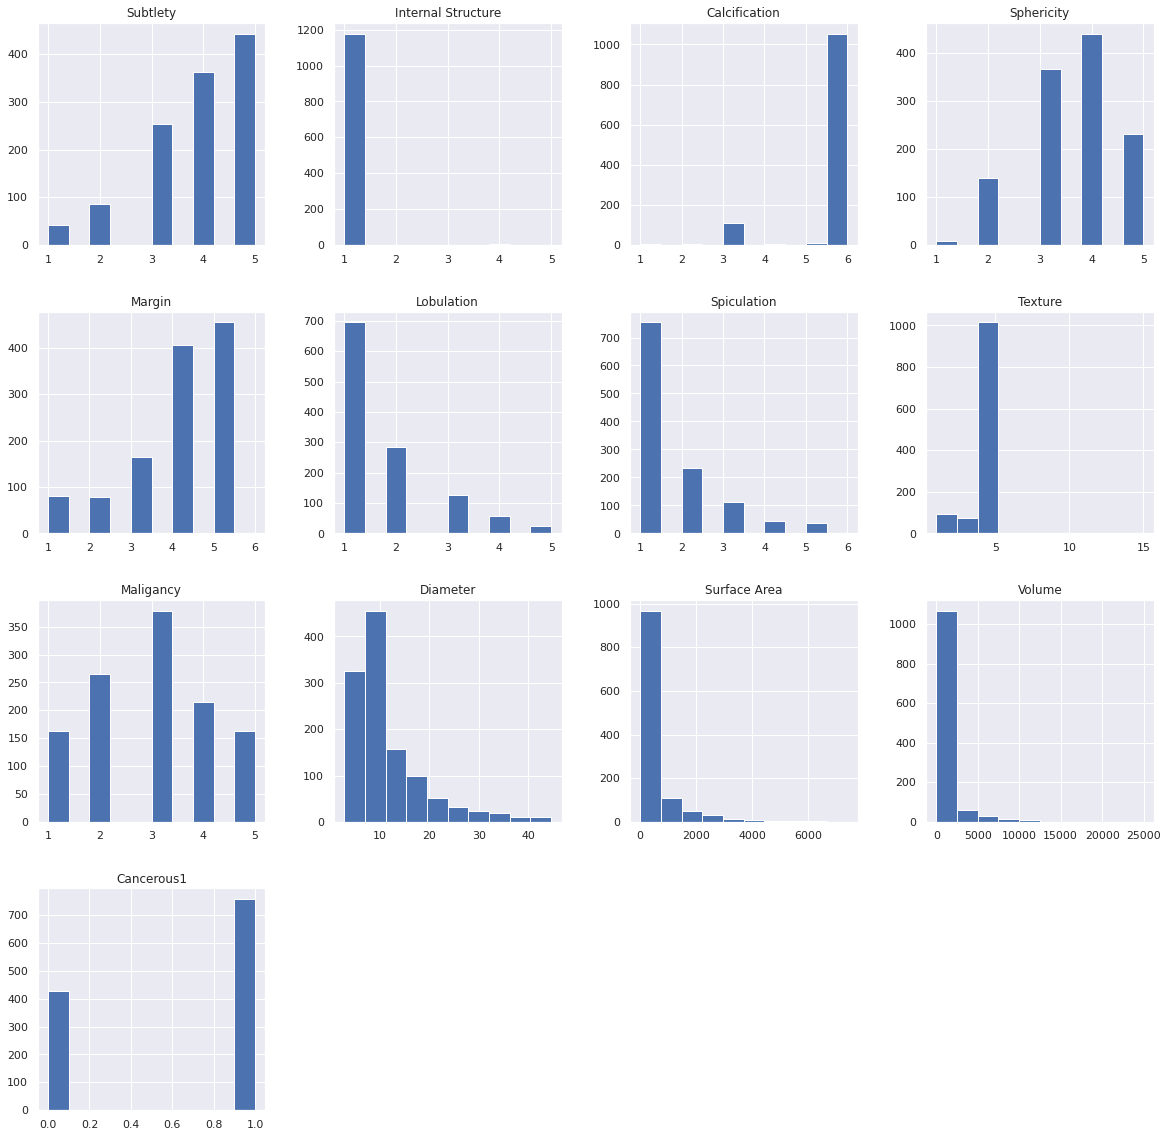

In [ ]:
p = diabetes_data.hist(figsize = (20,20))

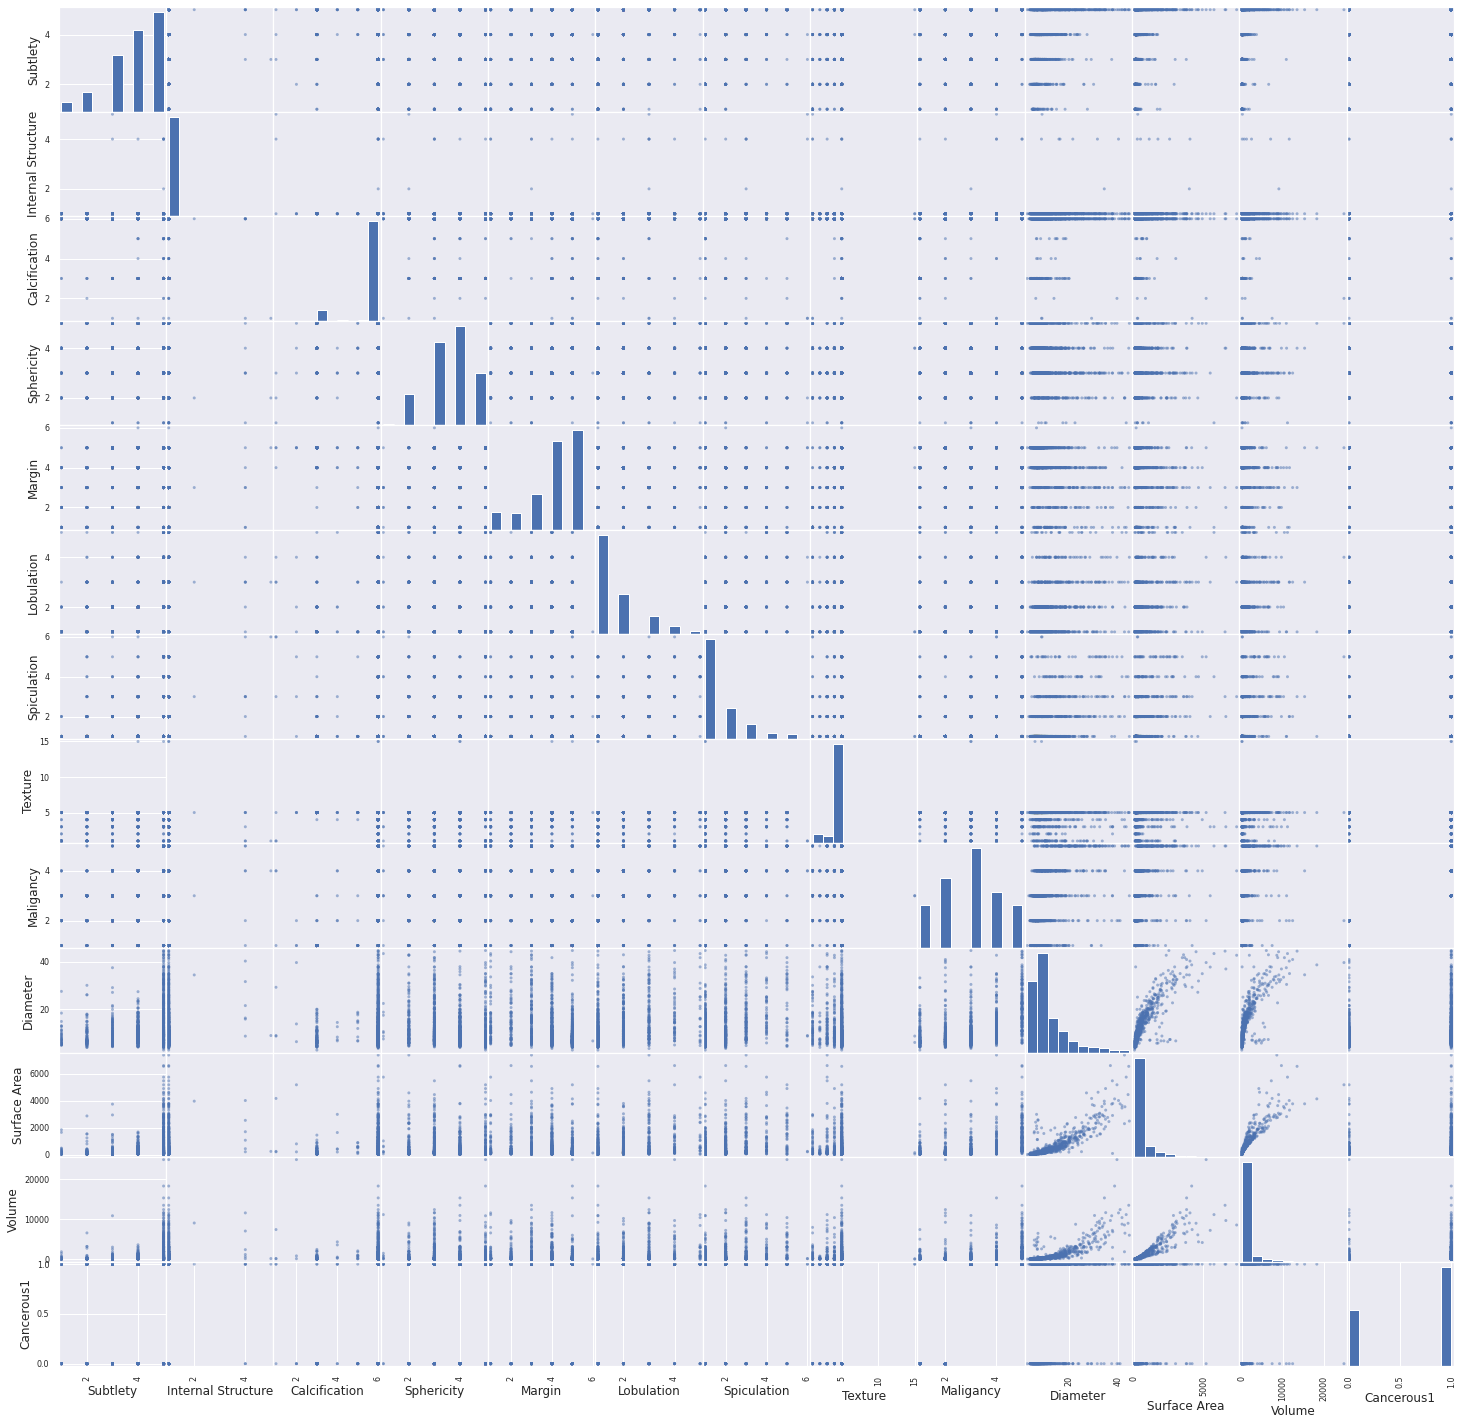

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

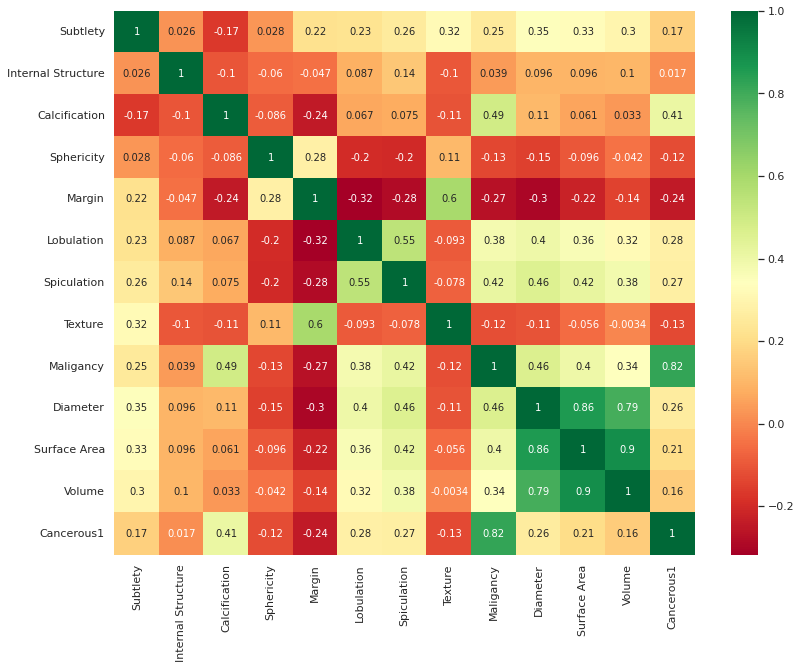

In [ ]:
plt.figure(figsize=(13,10))  
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data.drop(["Cancerous1"],axis = 1),),
        columns=['Subtley', 'Internal Structure', 'Calcification', 'Sphericity', 'Margin',
       'Lobulation', 'Spiculation', 'Texture', 'Maligancy', 'Diameter', 'Surface Area', 'Volume'])

In [ ]:
X.head()

,Subtley,Internal Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Maligancy,Diameter,Surface Area,Volume
0,1.001996,-0.079511,0.343772,-0.663228,-0.775551,1.361406,2.270039,-0.420935,0.850698,2.780742,2.746578,3.507660
1,-1.759507,-0.079511,0.343772,1.445587,-2.472604,-0.690217,-0.616594,-2.959386,1.666322,2.485049,2.841977,2.858743
2,1.001996,-0.079511,0.343772,-0.663228,-0.775551,0.335594,0.345617,-1.267085,1.666322,2.529605,1.690210,2.162751
3,0.081495,-0.079511,0.343772,-0.663228,0.072976,-0.690217,-0.616594,0.425216,0.850698,0.234267,-0.243392,-0.223754
4,0.081495,-0.079511,0.343772,0.391180,0.921503,-0.690217,-0.616594,0.425216,0.850698,0.412494,0.128597,0.190117


In [ ]:
y = diabetes_data.Cancerous1

In [ ]:
X = diabetes_data.drop("Cancerous1",axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 65.15151515151516 % and k = [11]


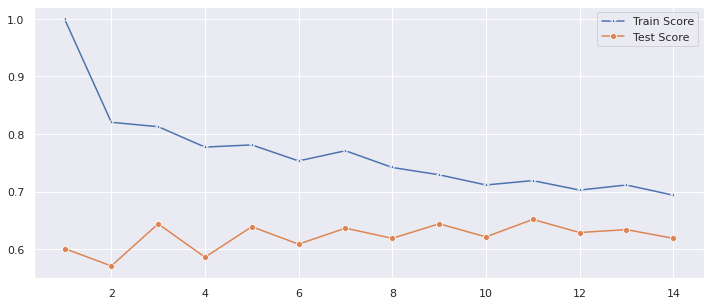

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6515151515151515

In [ ]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,67,76,143
1,62,191,253
All,129,267,396


Text(0.5, 12.5, 'Predicted label')

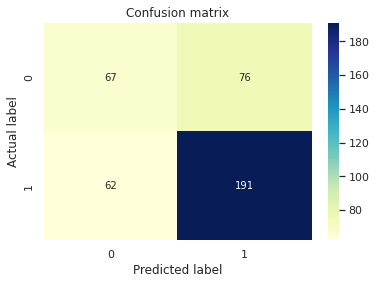

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.47      0.49       143
           1       0.72      0.75      0.73       253

    accuracy                           0.65       396
   macro avg       0.62      0.61      0.61       396
weighted avg       0.64      0.65      0.65       396



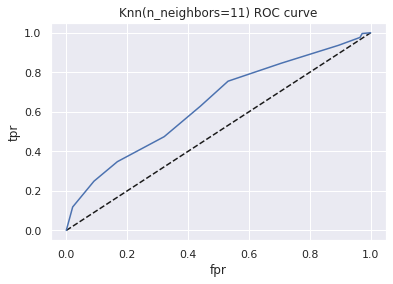

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6386439647309211

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.6661028968549445
Best Parameters: {'n_neighbors': 30}


In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.6338


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.6288


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.6894


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 1.0000


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9949


In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9949


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.6389


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.6389


In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.5631


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.5581


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)

0.6388888888888888